<a href="https://colab.research.google.com/github/rahmadr2612/AndroidStudio/blob/main/DataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#1. Memuat dan Memproses Data

## Memuat data

In [ ]:
file_path = '/content/drive/MyDrive/BengkelKoding/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(file_path, names=column_names)

## Menampilkan tipe data untuk setiap kolom

In [ ]:
print("Tipe data sebelum konversi:")
print(data.dtypes)

Tipe data sebelum konversi:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object


## Menampilkan jumlah nilai NaN untuk setiap kolom

In [ ]:
print("\nJumlah nilai NaN untuk setiap kolom sebelum konversi:")
print(data.isna().sum())


Jumlah nilai NaN untuk setiap kolom sebelum konversi:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Mengganti nilai '?' dan '-9' dengan NaN, lalu konversi ke numerik

In [ ]:
data.replace('?', np.nan, inplace=True)
data.replace(-9, np.nan, inplace=True)
data[['ca', 'thal']] = data[['ca', 'thal']].apply(pd.to_numeric)

## Menampilkan jumlah nilai NaN untuk setiap kolom setelah konversi

In [ ]:
print("\nJumlah nilai NaN untuk setiap kolom setelah konversi:")
print(data.isna().sum())


Jumlah nilai NaN untuk setiap kolom setelah konversi:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


## Mengganti nilai yang hilang dengan median

In [ ]:
imputer = SimpleImputer(strategy='median')
data[['ca', 'thal']] = imputer.fit_transform(data[['ca', 'thal']])

## Menampilkan data beberapa baris awal setelah imputasi

In [ ]:
print("\nData beberapa baris awal setelah imputasi:")
print(data.head())


Data beberapa baris awal setelah imputasi:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


#2. Eksplorasi Data Awal

##Identifikasi Outlier Menggunakan Boxplot

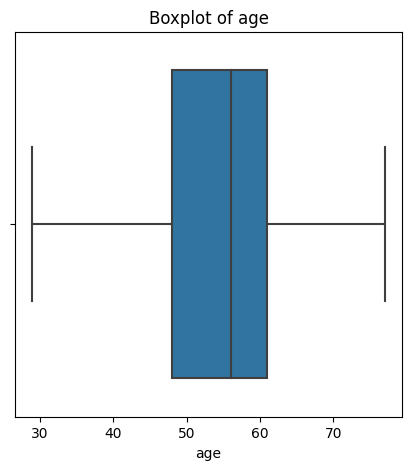

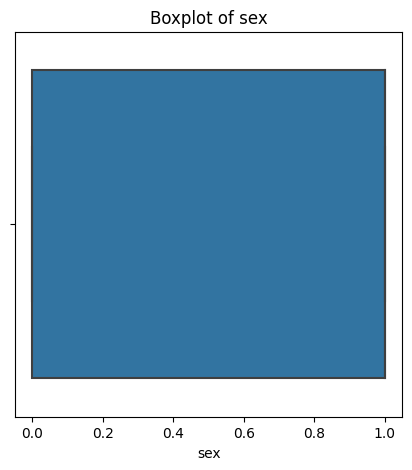

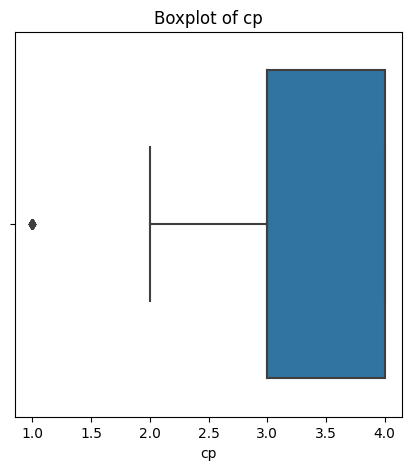

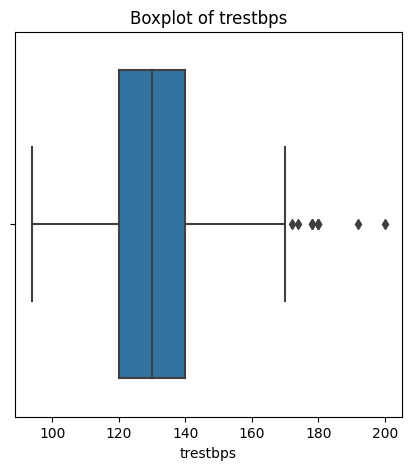

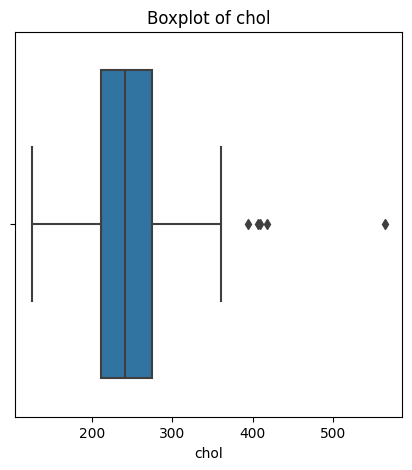

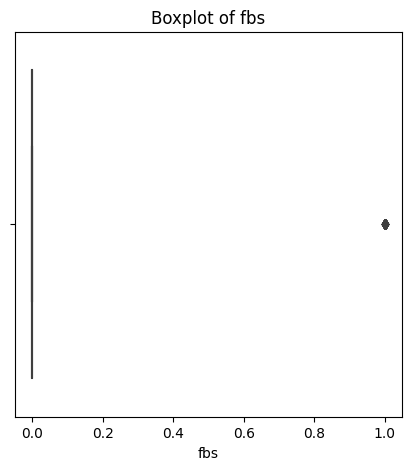

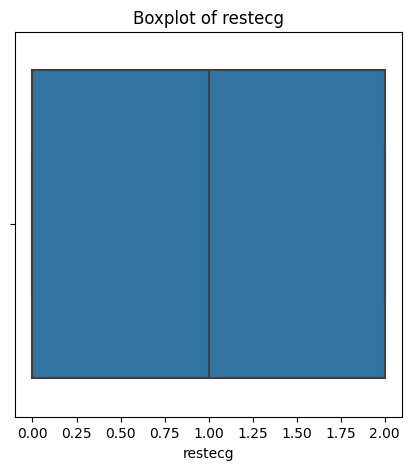

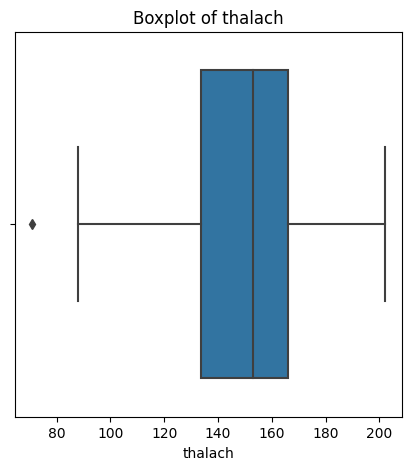

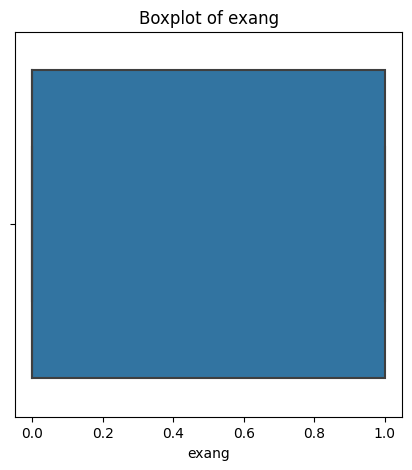

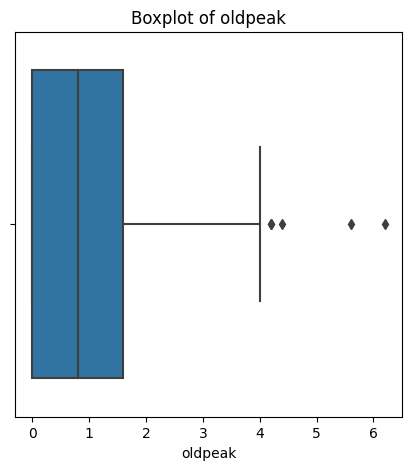

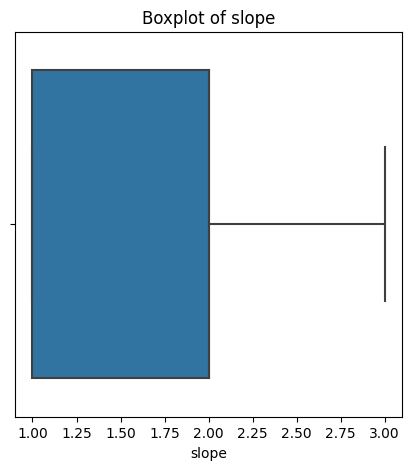

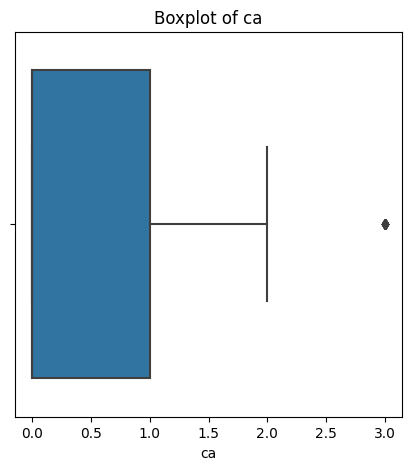

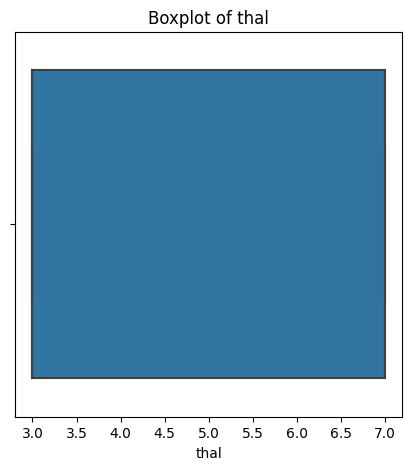

In [ ]:
for column in data.columns[:-1]:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

## Visualisasi Korelasi dengan Heatmap

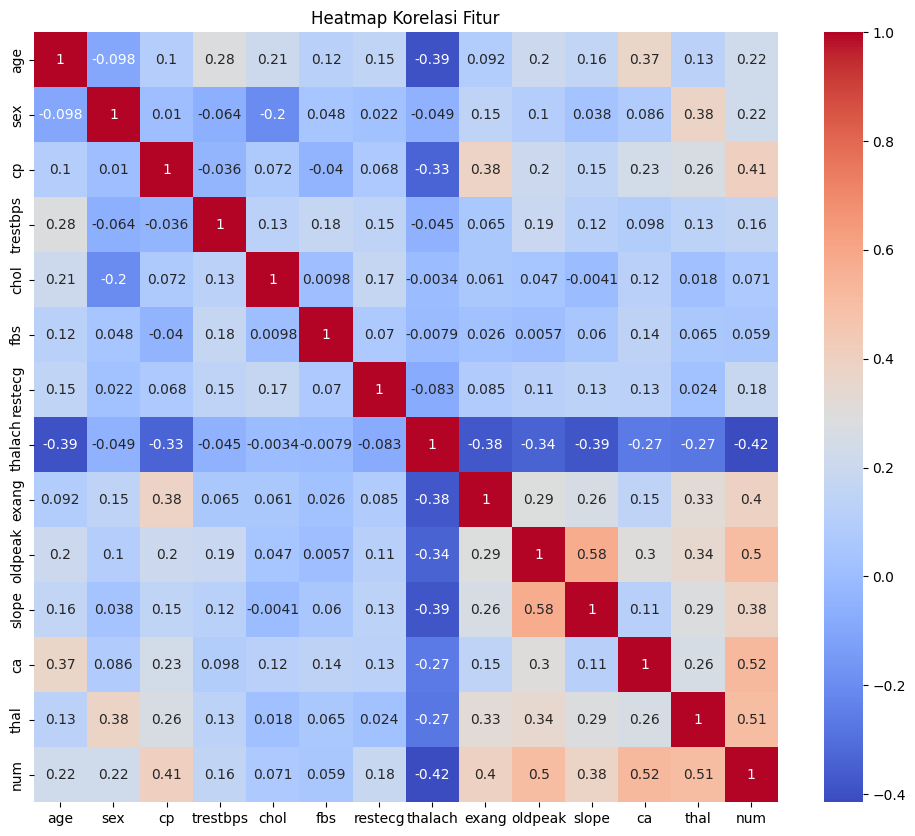

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

## Scatter Plot untuk Setiap Fitur terhadap Target

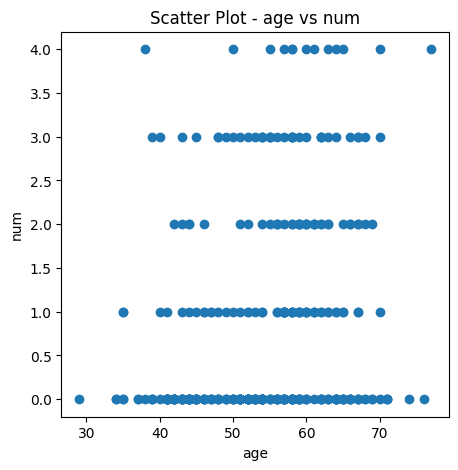

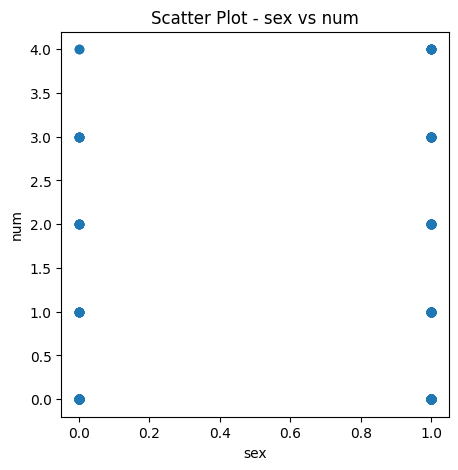

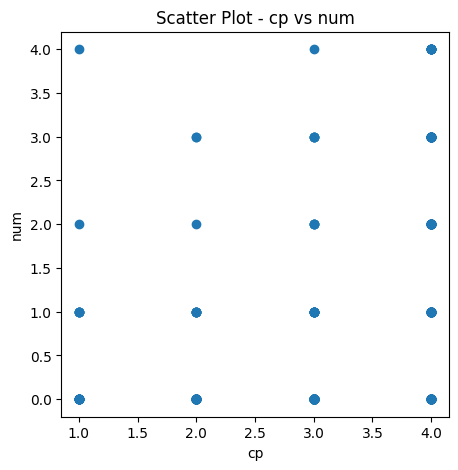

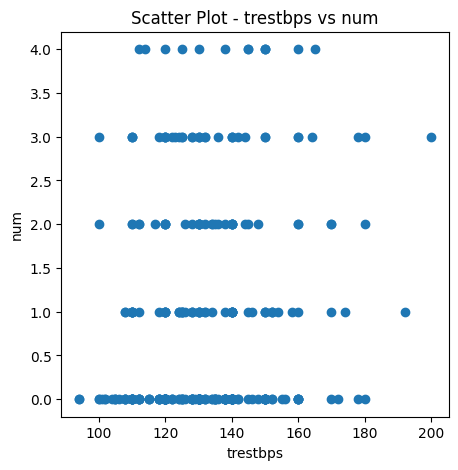

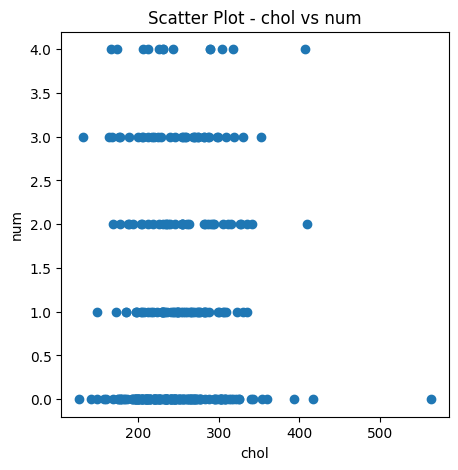

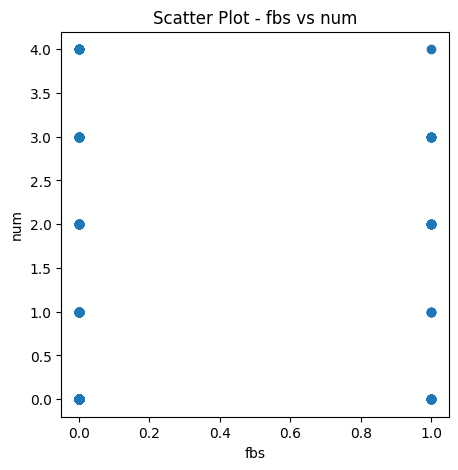

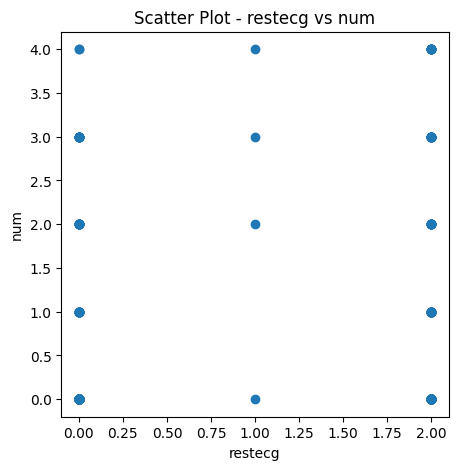

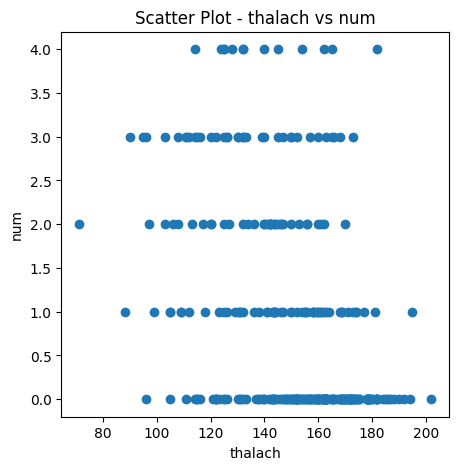

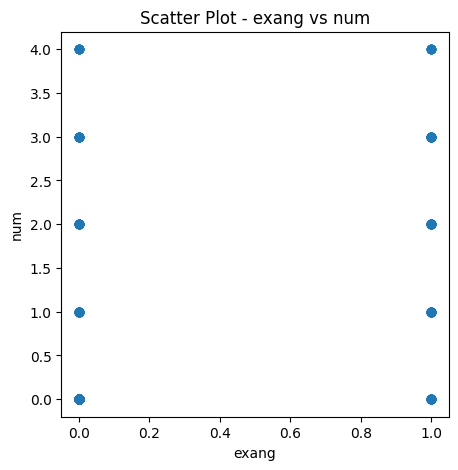

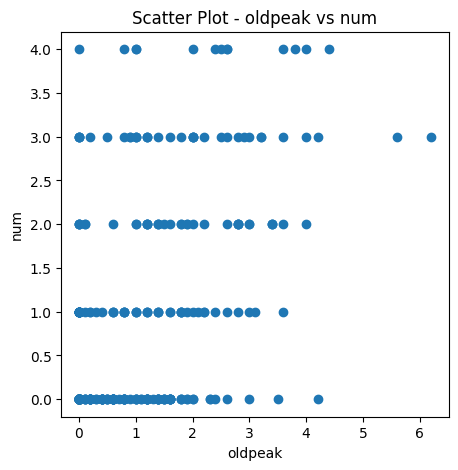

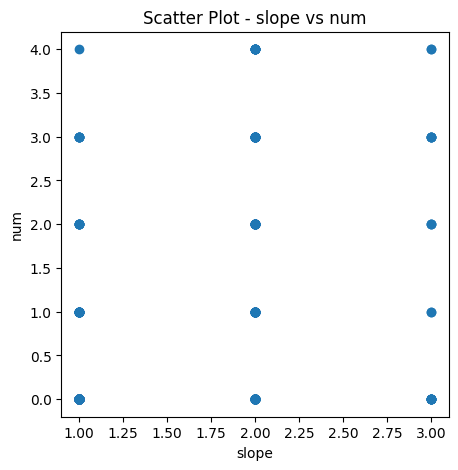

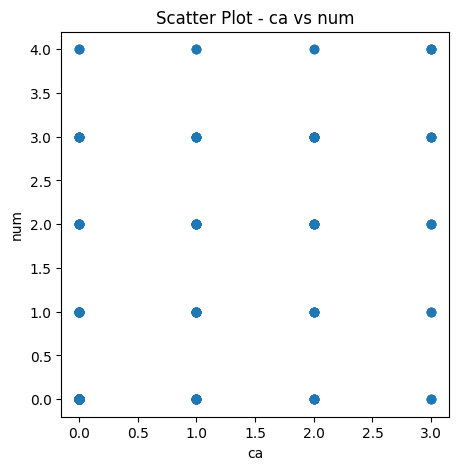

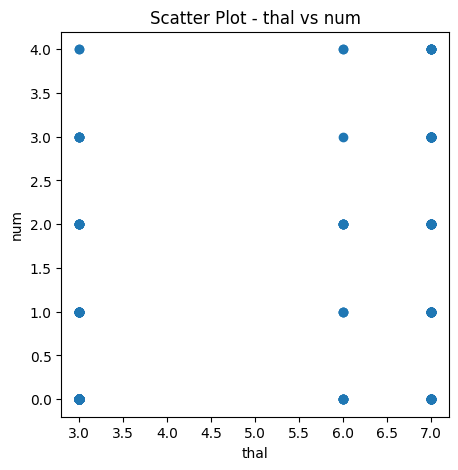

In [ ]:
for column in data.columns[:-1]:
    plt.figure(figsize=(5, 5))
    plt.scatter(data[column], data['num'])
    plt.xlabel(column)
    plt.ylabel('num')
    plt.title(f'Scatter Plot - {column} vs num')
    plt.show()

## Histogram untuk Distribusi Fitur

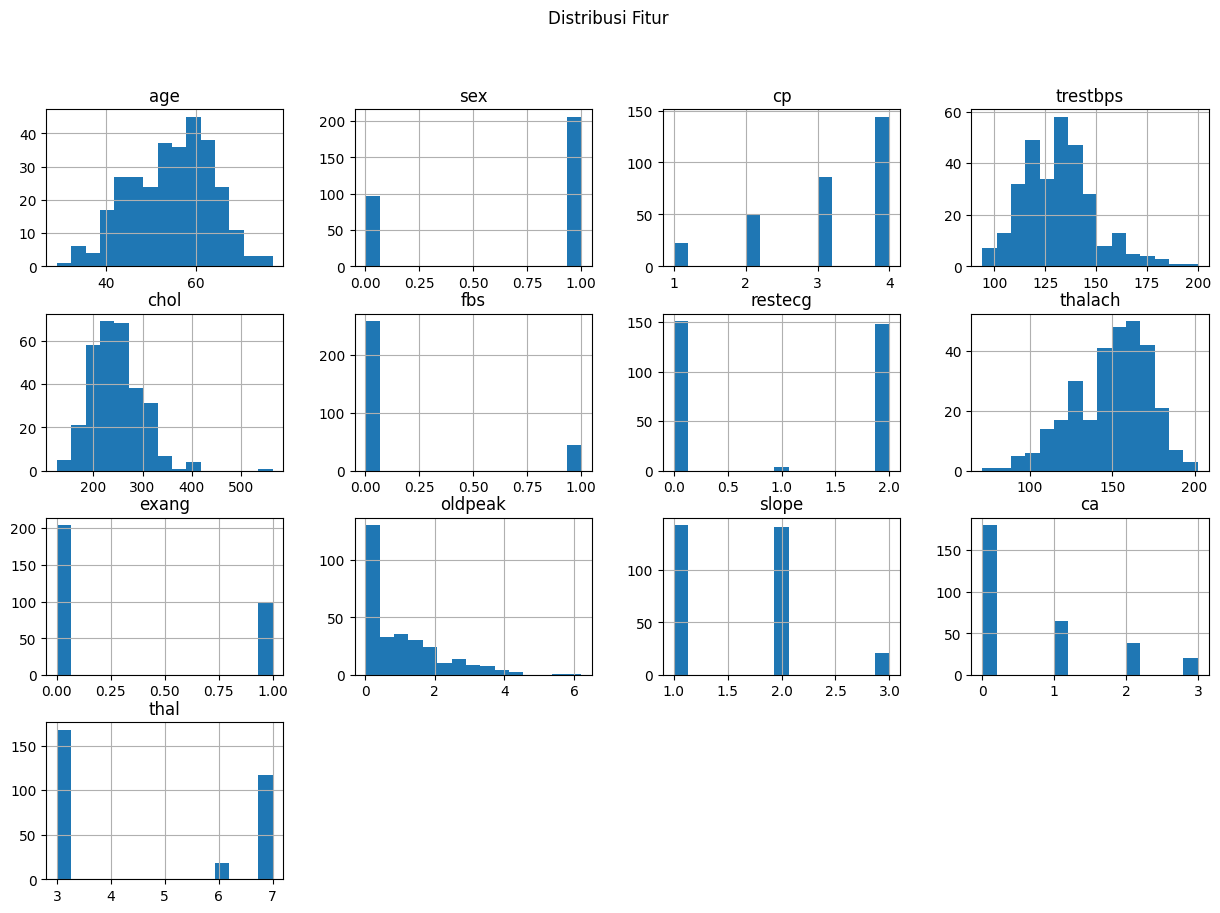

In [ ]:
data.drop('num', axis=1).hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribusi Fitur')
plt.show()

#3. Preprocessing Data

In [ ]:
scaler = StandardScaler()
features = data.drop('num', axis=1)
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

#4. Pemisahan Data

In [ ]:
X = scaled_data.drop('num', axis=1)
y = scaled_data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5. Pembangunan Model Dasar

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

#6. Evaluasi Model Dasar dengan Cross-Validation

In [ ]:
cv_log_reg = cross_val_score(log_reg, X, y, cv=5)
cv_rf = cross_val_score(random_forest, X, y, cv=5)
cv_svm = cross_val_score(svm_model, X, y, cv=5)

print("CV Score - Logistic Regression:", cv_log_reg.mean())
print("CV Score - Random Forest:", cv_rf.mean())
print("CV Score - SVM:", cv_svm.mean())

CV Score - Logistic Regression: 0.8282513661202184
CV Score - Random Forest: 0.8248087431693989
CV Score - SVM: 0.8281420765027322


#7. Hyperparameter Tuning

## Tuning untuk Logistic Regression

In [ ]:
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_

## Tuning untuk Random Forest

In [ ]:
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

## Tuning untuk SVM

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

#8. Evaluasi Model Akhir

In [ ]:
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Akurasi Logistic Regression (Tuned):", accuracy_log_reg)
print("Akurasi Random Forest (Tuned):", accuracy_rf)
print("Akurasi SVM (Tuned):", accuracy_svm)

Akurasi Logistic Regression (Tuned): 0.8360655737704918
Akurasi Random Forest (Tuned): 0.8852459016393442
Akurasi SVM (Tuned): 0.9016393442622951
